In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# plt.style.use('seaborn-whitegrid')
import os
from datetime import date

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
#plt.style.use("ggplot")


In [32]:
df = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")

In [33]:
#temp2 = df.copy()

In [34]:
#df

In [35]:
df.rename(columns={"USER":"UserId","order_date":"OrderDate"},inplace=True)

In [36]:
df.drop(["brandnm","goodsnm","reg_date","p_type","sub_type","app_yn"], axis=1,inplace=True)

In [37]:
df['OrderDate'].head()


0   2021-01-15
1   2021-01-15
2   2021-01-15
3   2021-01-15
4   2021-01-15
Name: OrderDate, dtype: datetime64[ns]

In [38]:
df['OrderDate'].dtype

dtype('<M8[ns]')

In [39]:
df['OrderPeriod']=df['OrderDate'].dt.strftime('%Y-%m')

In [40]:
df.set_index('UserId',inplace=True)

In [41]:
FirstOrder=df.groupby(df.index)['OrderDate'].min()

In [42]:
FirstOrder=FirstOrder.dt.strftime('%Y-%m')

In [43]:
df['FirstOrder']=FirstOrder

In [44]:
df.reset_index(inplace=True)

In [45]:
df.head()

,UserId,OrderDate,OrderPeriod,FirstOrder
0,a161237,2021-01-15,2021-01,2021-01
1,a1140859,2021-01-15,2021-01,2021-01
2,a1140859,2021-01-15,2021-01,2021-01
3,a1140859,2021-01-15,2021-01,2021-01
4,a1140740,2021-01-15,2021-01,2021-01


In [46]:
grouped = df.groupby(['FirstOrder', 'OrderPeriod'])

In [47]:
cohorts=grouped['UserId'].nunique()

In [48]:
cohorts=cohorts.reset_index()

In [49]:
cohorts.rename({'UserId':'TotalUsers'},axis=1,inplace=True)

In [50]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2021-01    1
2021-02    1
2021-03    1
Name: FirstOrder, dtype: int64

In [51]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [52]:
cohorts['CohortPeriod']=cohortperiod

In [53]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

In [54]:
cohorts=cohorts['TotalUsers'].unstack(1)

In [55]:
user_retention=cohorts.divide(cohorts[0],axis=0)

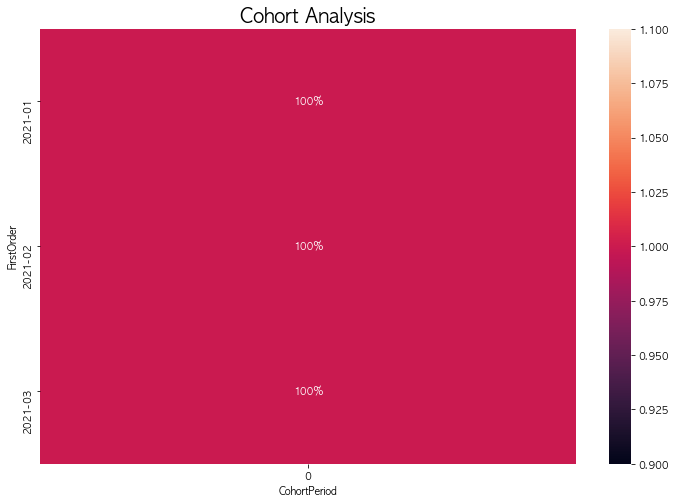

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

- 중복되는 Userid가 없기때문에 Cohort를 구할 수 없는 데이터. 
- Ecommerce에서 쓰는 Session 데이터인지 확인 필요.